In [1]:
import pandas as pd #traiter csv
import numpy as np #algebre lineare
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation

In [2]:
data = pd.read_csv('auto-mpg.csv') #charger le fichier
data.head()
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data.index
data.shape

(398, 9)

In [5]:

data = data[data.horsepower != '?'] # on supprime les donnees correspondent a '?'
data.horsepower = data.horsepower.astype(int) # changer le type 
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int32
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


F:\anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
#aligner des donnees ver [0,1] pour mieux le visualiser
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b
data_scale = data.copy()
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford torino


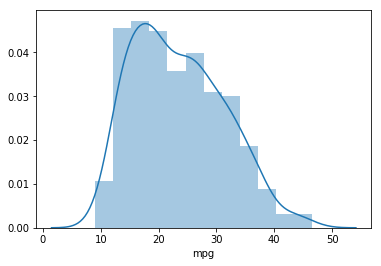

In [7]:
sns.distplot(data['mpg'])

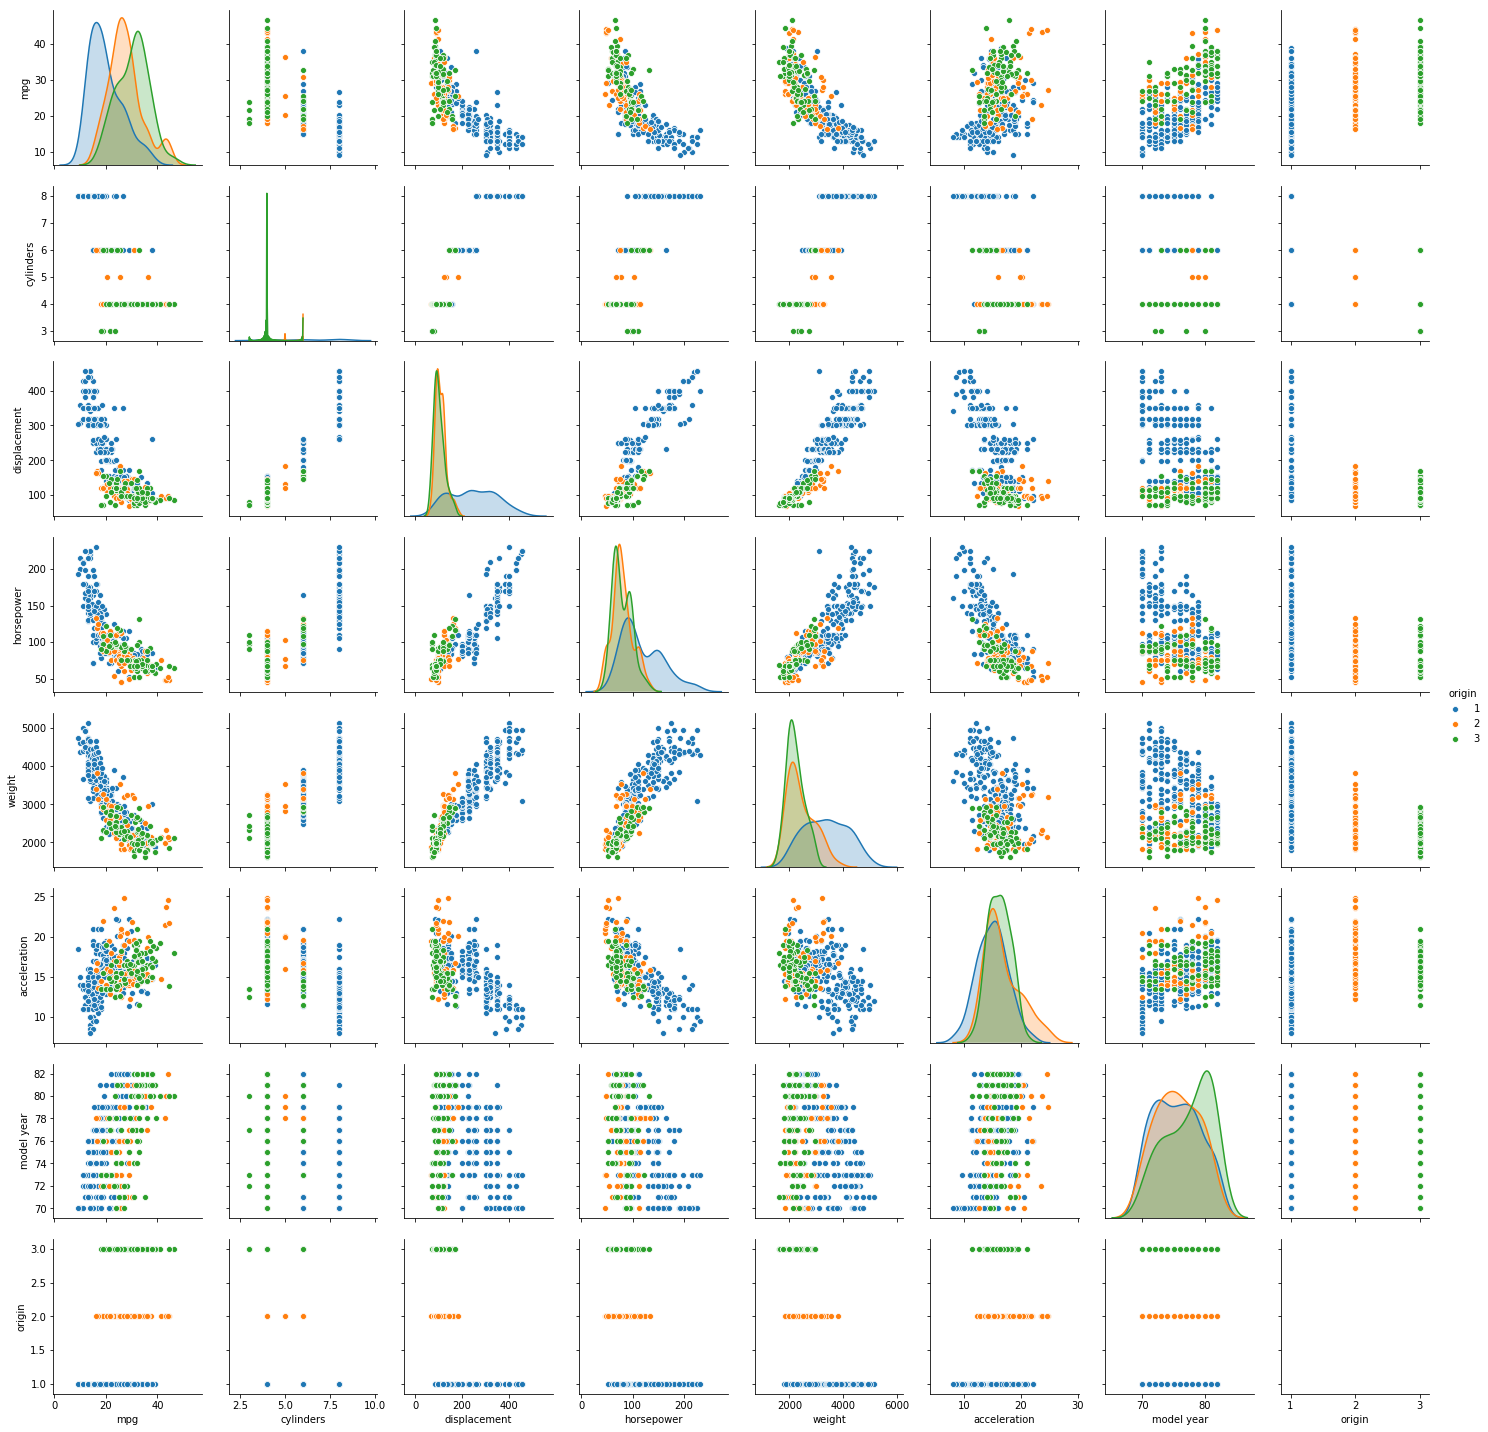

In [38]:
sns.pairplot(data.drop(['car name'],axis=1),hue='origin')

# Hypotheses 

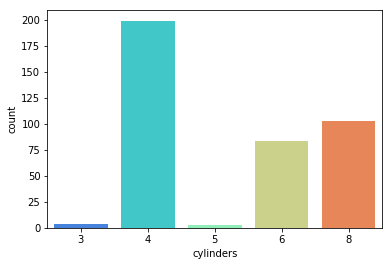

In [34]:
sns.countplot(data.cylinders,data=data,palette = "rainbow")

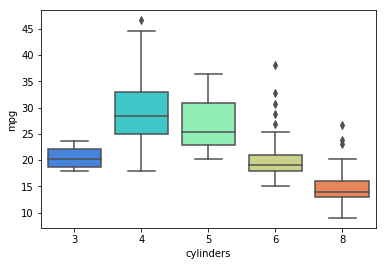

In [36]:
sns.boxplot(y='mpg',x='cylinders',data=data,palette = "rainbow")

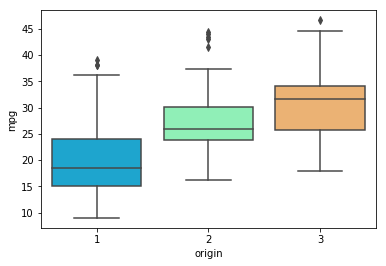

In [10]:
sns.boxplot(y='mpg',x='origin',data=data,palette = "rainbow")
plt.show()

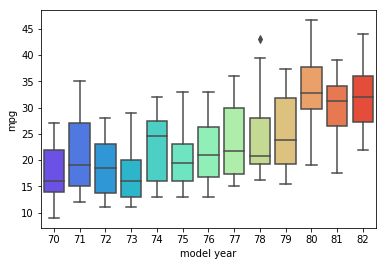

In [11]:
sns.boxplot(y='mpg',x='model year',data=data,palette = "rainbow")
plt.show()

In [25]:
X = data.iloc[:,1:7].values
y = data.mpg.values
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)


# Lineare regresstion 

In [30]:
reg = LinearRegression()
reg.fit(X_train,y_train)
Y_pred = reg.predict(X_test) # predict using the method
print('score train set',(reg.score(X_train,y_train)))
print('score test set',(reg.score(X_test,y_test)))

score train set 0.811683812593389
score test set 0.798334512883872


# Logistic regression 

In [ ]:
from sklearn 